### `Covid_19` Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Reading Dataset

In [2]:
covid_19 = pd.read_csv("E:/PYTHON/Covid_19/Covid_19 datasets/worldometer_data.csv")

In [3]:
covid_19.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


### Data Cleaning

#### Find NaN values and change NaN values into 0

In [4]:
covid_19.fillna(0, inplace=True)
covid_19.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


#### Changing Scientific Notation format

In [5]:
pd.set_option('display.float_format', '{:.0f}'.format)

#### Describe of `Covid_19` Data

In [6]:
covid_19.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,209,209,209,209,209,209,209,209,209,209,209,209,209
mean,30269958,91718,38,3412,4,57752,24,27135,312,3181,88,1281623,76728
std,104535128,432587,464,14729,57,254347,293,172987,1584,5184,168,5322273,147870
min,0,10,0,0,0,0,0,0,0,0,0,0,0
25%,897095,712,0,12,0,308,0,74,0,279,4,10808,6261
50%,6942854,4491,0,70,0,2010,0,858,2,1000,20,109946,29041
75%,25528864,36896,0,600,0,19596,0,7113,41,3806,80,692430,75521
max,1381344997,5032179,6590,162804,819,2576668,4140,2292707,18296,39922,1238,63139605,995282


### `Covid_19` Visualizations

#### `Top_10` Total Deaths Country wise

In [7]:
covid_copy = covid_19.copy() # copy the original data from covid_19 to df_copy
covid_copy = covid_copy.sort_values(by='TotalDeaths', ascending=False) # sort the totaldeath in descending order
Top_10 = covid_copy.head(10) #its shows top 30 higest values

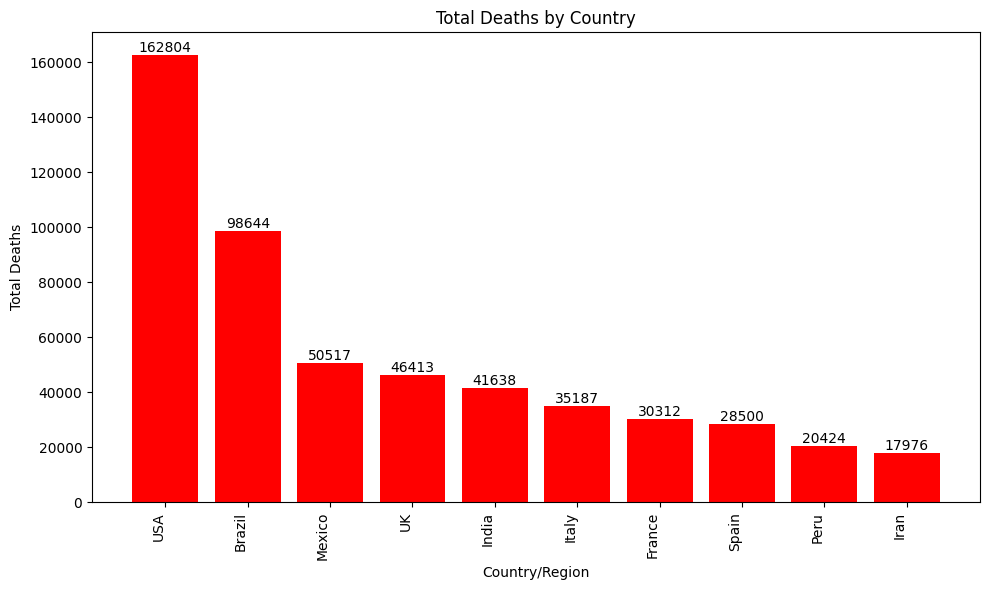

In [8]:
plt.figure(figsize=(10, 6))
bars1 = plt.bar(Top_10['Country/Region'], Top_10['TotalDeaths'], color='red')

# Add labels for Active Cases on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Total Deaths by Country')
plt.xlabel('Country/Region')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()

#### Country wise `top_10` High Population 

In [9]:
pop_copy = covid_19.copy() # copy the original data from covid_19 to df_copy
pop_copy = pop_copy.sort_values(by='Population', ascending=False) # sort the totaldeath in descending order
Top_10 = pop_copy.head(10) #its shows top 30 higest values

Text(0.5, 1.0, 'Country-wise Top 10 Population')

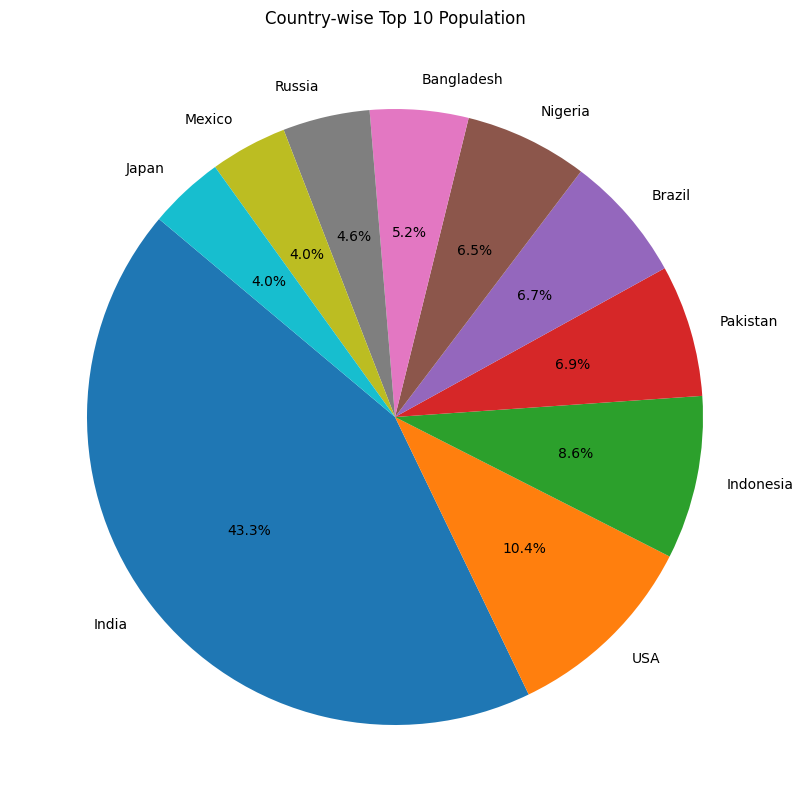

In [10]:
plt.figure(figsize=(10, 10))
plt.pie(Top_10['Population'], labels=Top_10['Country/Region'], autopct='%1.1f%%', startangle=140)
plt.title('Country-wise Top 10 Population')

#### `Total Cases` and `Total Deaths` comparison

In [11]:
# Sort the DataFrame by TotalCases for better visualization
cases_copy = covid_19.copy()
cases_copy = covid_19.sort_values(by='TotalCases', ascending=False)
Top_10 = cases_copy.head(10)

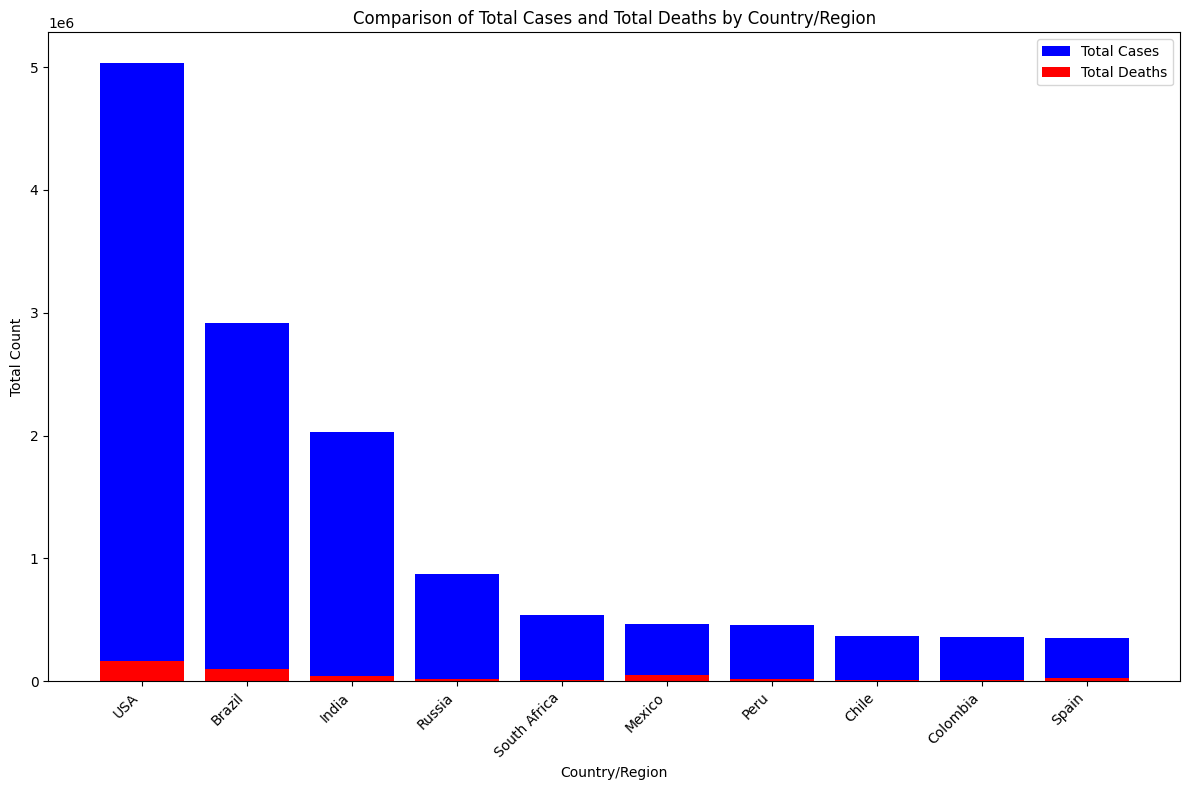

In [12]:
plt.figure(figsize=(12, 8))
plt.bar(Top_10['Country/Region'], Top_10['TotalCases'], color='blue', label='Total Cases')
plt.bar(Top_10['Country/Region'], Top_10['TotalDeaths'], color='red', label='Total Deaths')
plt.title('Comparison of Total Cases and Total Deaths by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Total Count')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

#### `Total Deaths` by `Continent` wise

In [13]:
cont_copy = covid_19.copy() # copy the original data from covid_19 to df_copy
cont_copy = cont_copy.sort_values(by='TotalDeaths', ascending=False) # sort the totaldeath in descending order
cont_copy = cont_copy.head()

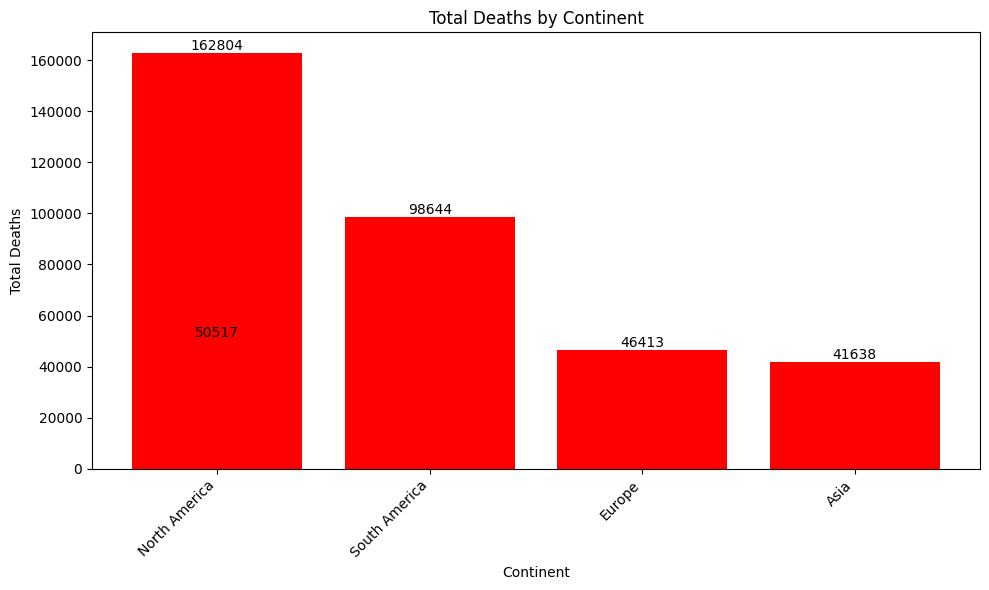

In [14]:
plt.figure(figsize=(10, 6))
bars1 = plt.bar(cont_copy['Continent'], cont_copy['TotalDeaths'], color='red')

# Add labels for Active Cases on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Total Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()

#### `New Cases` and `New Deaths` Comparison country wise

In [15]:
NewCase_copy = covid_19.copy()
NewCase_copy = NewCase_copy.sort_values(by='NewCases', ascending=False)
Top_5 = NewCase_copy.head(5)

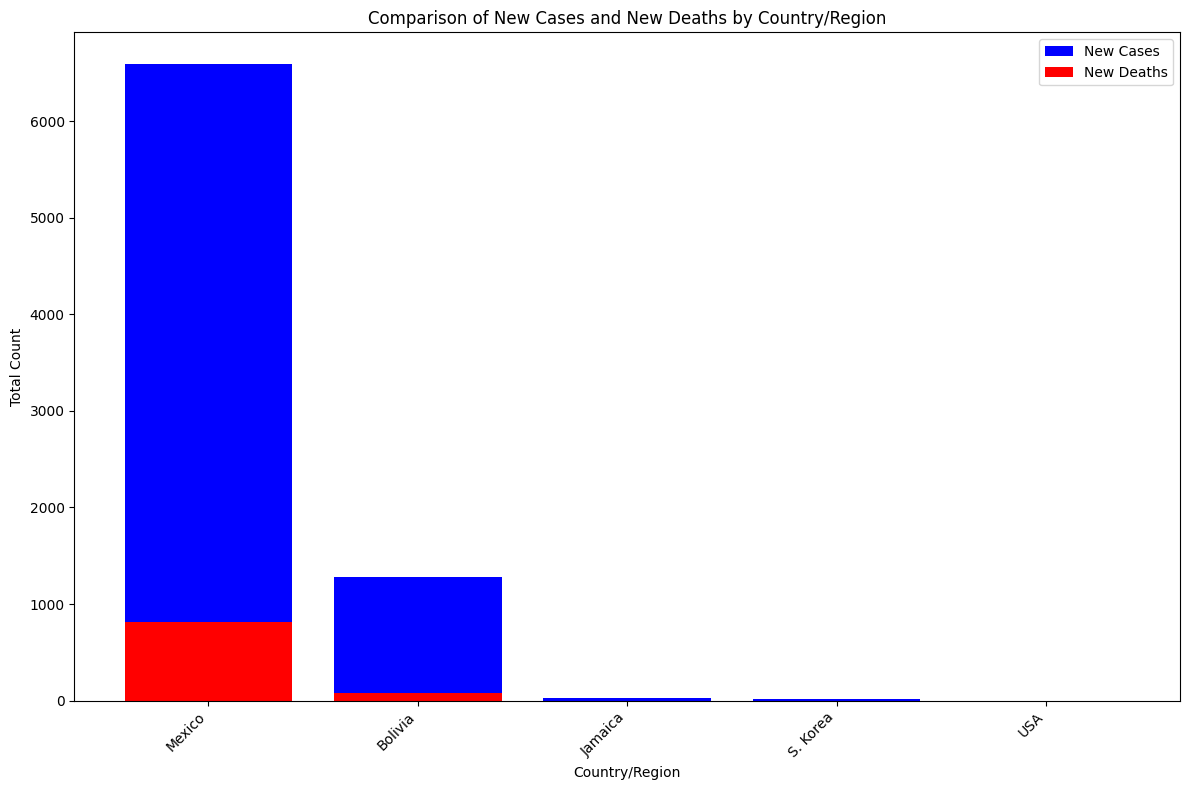

In [16]:
plt.figure(figsize=(12, 8))
plt.bar(Top_5['Country/Region'], Top_5['NewCases'], color='blue', label='New Cases')
plt.bar(Top_5['Country/Region'], Top_5['NewDeaths'], color='red', label='New Deaths')
plt.title('Comparison of New Cases and New Deaths by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Total Count')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

#### `Total Cases` and `Total Recovered` Country wise

In [17]:
Recovered_copy = covid_19.copy()
Recovered_copy = Recovered_copy.sort_values(by="TotalCases", ascending=False)
Top_10 = Recovered_copy.head(10)

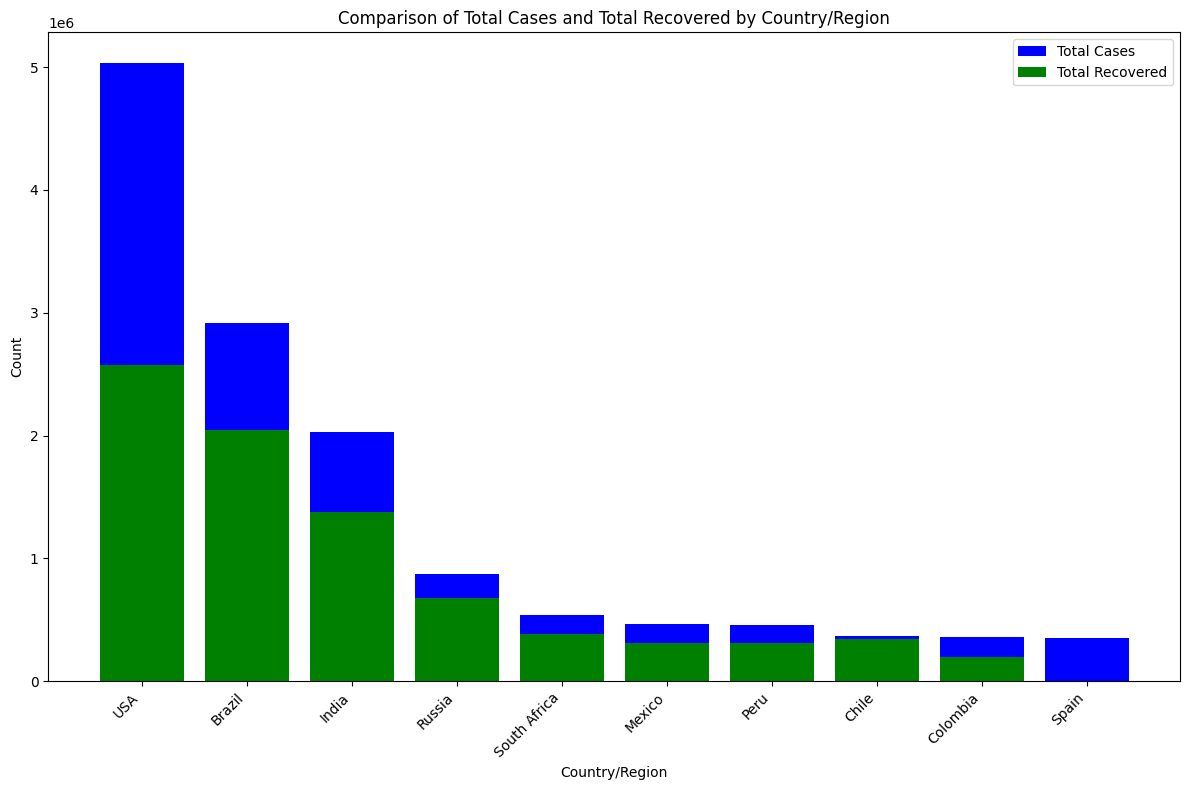

In [33]:
plt.figure(figsize=(12, 8))
plt.bar(Top_10['Country/Region'], Top_10['TotalCases'], color='blue', label='Total Cases')
plt.bar(Top_10['Country/Region'], Top_10['TotalRecovered'], color='green', label='Total Recovered')
plt.title('Comparison of Total Cases and Total Recovered by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

#### Comparison of `Active` `Cases` and `Serious,Critical` `Cases` country wise

In [19]:
covid_19.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,0,162804,0,2576668,0,2292707,18296,15194,492,63139605,190640,Americas
1,Brazil,South America,212710692,2917562,0,98644,0,2047660,0,771258,8318,13716,464,13206188,62085,Americas
2,India,Asia,1381344997,2025409,0,41638,0,1377384,0,606387,8944,1466,30,22149351,16035,South-EastAsia
3,Russia,Europe,145940924,871894,0,14606,0,676357,0,180931,2300,5974,100,29716907,203623,Europe
4,South Africa,Africa,59381566,538184,0,9604,0,387316,0,141264,539,9063,162,3149807,53044,Africa


In [20]:
Serious_copy = covid_19.copy()
Serious_copy_copy = Serious_copy.sort_values(by="ActiveCases", ascending=False)
Top_10 = Serious_copy.head(10)

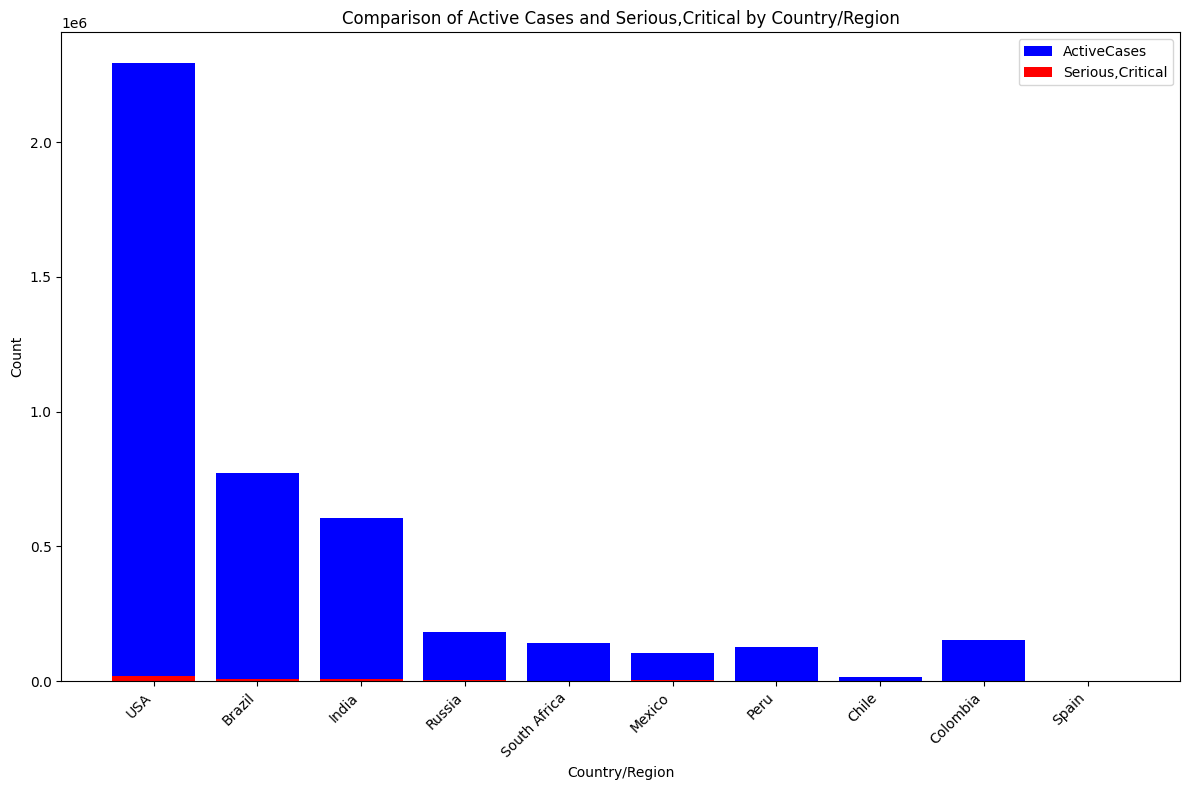

In [21]:
plt.figure(figsize=(12, 8))
plt.bar(Top_10['Country/Region'], Top_10['ActiveCases'], color='blue', label='ActiveCases')
plt.bar(Top_10['Country/Region'], Top_10['Serious,Critical'], color='red', label='Serious,Critical')
plt.title('Comparison of Active Cases and Serious,Critical by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

#### `Country` with Highly `Recovered` Cases

In [24]:
most_rec = covid_19.copy()
most_rec = most_rec.sort_values(by='TotalRecovered', ascending=False)
Top_5 = most_rec.head()

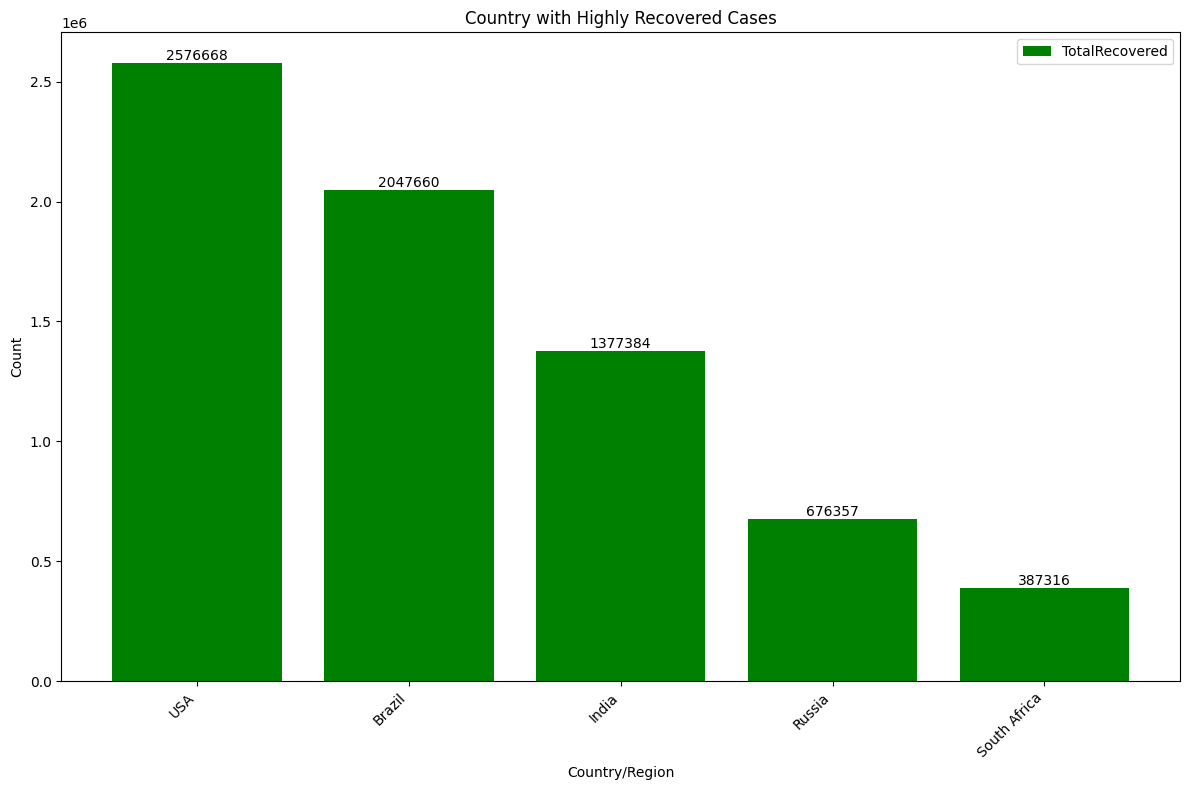

In [35]:
plt.figure(figsize=(12, 8))
bars1 = plt.bar(Top_5['Country/Region'], Top_5['TotalRecovered'], color='green', label='TotalRecovered')

# Add labels for Active Cases on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Country with Highly Recovered Cases')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()